In [1]:
from app.services.parsing_patientdata import PatientData
import numpy as np

ORTHANC_URL = "http://127.0.0.1:8042"
target_name = "Emma Davis"

np.set_printoptions(threshold=np.inf)  # 전체 배열 출력
np.set_printoptions(linewidth=200)    # 한 줄 길이 설정

parsing_patient = PatientData(ORTHANC_URL)
patient_tag_data, studies = parsing_patient.parsing_target_patient(target_name)
studies_tag_data, series = parsing_patient.parsing_target_studies(studies)
instances_data, modality = parsing_patient.parsing_target_series(series)
instances_images = parsing_patient.parsing_target_dicom_images(instances_data)

print(studies)
print(patient_tag_data)
print(instances_data)
print(instances_images.shape)
print(studies_tag_data['StudyDescription'])

['6b09b7f8-1507b778-44fb52ee-1bba8a93-461f75d7']
{'PatientBirthDate': '20240313', 'PatientID': '1.2.826.0.1.3680043.8.498.7573464407110708614670445210431232013', 'PatientName': 'Emma Davis', 'PatientSex': 'F'}
['53a72699-a870dd33-732ae4cc-fcbba8d7-b30fca1b', '64829597-913ec2f6-558c5fac-807f4421-82ce5c6c', '7857c744-93afa6da-4c72f2a5-2b80ac58-1e358afb', '7d3521ce-123ee122-03935c20-90608221-b1114b92', '9a69e992-ad4e73da-9b2c34f6-d842fb3a-a8092a06', 'a00badf3-0c87d320-4a3d057b-7524a552-c4a711f3', 'a24919ca-18bf3cee-1fe80b3e-540d8d82-060cf233', 'b5119c4e-829c4021-54bc2111-8a4f52cf-2946aea3', 'bf28ee7f-169ab744-cf14ce2c-2f910f97-7c6efed3', 'c1a4a5a4-f8d2aa51-8ea138a2-214e8aec-c2dd0c0d', 'e50031c6-611607fa-7c90e70d-9267ddab-703c1f1a', 'f98c31d2-1db09c5b-a9eb79af-b50a0993-093e1f56']
torch.Size([12, 3, 400, 400])
Appendicitis+-


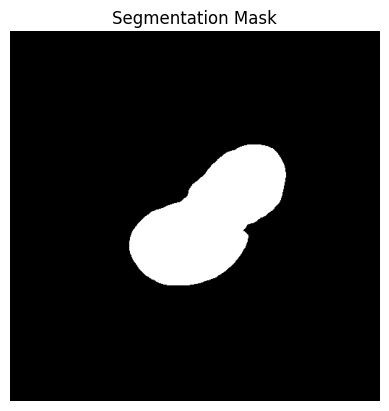

In [10]:
import requests
import numpy as np
import matplotlib.pyplot as plt


# FastAPI 서버에서 가져오기
resp = requests.post("http://127.0.0.1:8000/image/segmentation_array",json={"instanceUUID":'b6291d44-100cffc4-28e32b4f-a746b007-0da58616'})

# JSON 파싱
resp_json = resp.json()
hex_data = resp_json["data"]

# hex → bytes
byte_data = bytes.fromhex(hex_data)

# bytes → numpy 배열
# shape, dtype를 서버에서 같이 보내주면 좋지만, 지금은 (H, W) 임의 지정
# 예: 512x512 세그멘테이션 마스크
H, W = 512, 512
mask = np.frombuffer(byte_data, dtype=np.uint8).reshape(H, W)

# 시각화
plt.imshow(mask, cmap="gray")
plt.title("Segmentation Mask")
plt.axis("off")
plt.show()
